In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1
Checking that the data is okay, and removing null/nan values. Be aware that some of this code takes a while to run (especially the gridsearches), and all outputs are already shown.

In [3]:
# import the data
numu = pd.read_csv("numu_energy_studies.csv")

In [4]:
# Sanity checks
numu.head(5)

,Unnamed: 0,i,neutrinoE,trueKE,recoE_lookup,total_PMTs_hits2,total_hits2,total_ring_PEs2,pot_length2,hits_pot_length2,recoDWallR2,recoDWallZ2,lambda_max_2,recoDWall_2,recoToWall_2,vtxTrackBias_2
0,0,0,664.541,236.327,22.35380,0.000000,0.023325,0.00000,0.662787,0.003754,0.003389,0.458415,0.650854,0.003389,0.220977,-0.011905
1,1,3,400.551,186.765,2.46971,0.000000,0.010075,0.00000,0.662787,0.001621,0.003389,0.458415,0.405903,0.003389,0.220977,-2.269040
2,2,4,633.353,448.481,409.95400,0.308444,0.080400,0.13070,0.531171,0.016146,0.035389,0.753969,0.537975,0.035389,0.494926,0.024453
3,3,7,845.921,586.647,37.83740,0.000000,0.011950,0.00000,0.918554,0.001388,0.042498,0.083664,0.830098,0.042498,0.805578,-0.007114
4,4,9,1323.140,963.822,1408.07000,0.111333,0.142300,0.26265,0.093641,0.162093,0.616305,0.164307,0.092105,0.358487,0.135845,-0.004307


Looks good, but unnamed index doesnt seem needed. Check if there are any nans


In [5]:
# Checking for empty
print(numu.isnull().values.any())

True


Remove null/nan values:

In [9]:
# drop nan
numu = numu.dropna()

In [10]:
# Checking for empty
print(numu.isnull().values.any())

False


In [18]:
# Check counts of each variable
print(len(numu['total_hits2']))
print(len(numu['total_ring_PEs2']))
print(len(numu['recoDWallR2']))
print(len(numu['recoDWallZ2']))
print(len(numu['lambda_max_2']))
print(len(numu['trueKE']))

163592
163592
163592
163592
163592
163592


All of the same length, so now we plot 1D distributions of these 6 variables:

In [46]:
def hists(variable):
    plt.hist(numu[variable], bins = 100, histtype= 'step',linewidth=3)
    plt.title(variable, fontsize = 20)
    plt.yscale('log')
    plt.show()

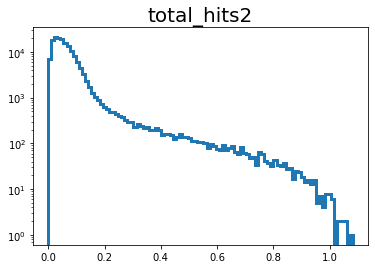

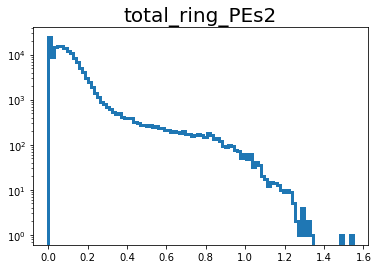

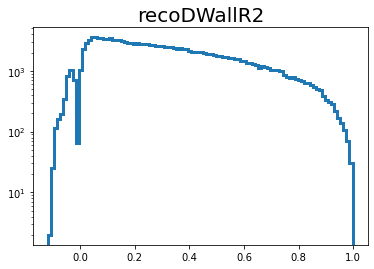

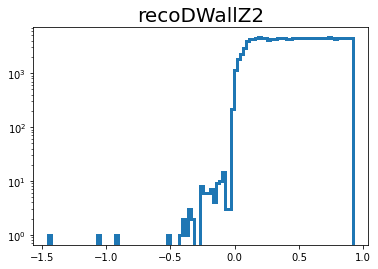

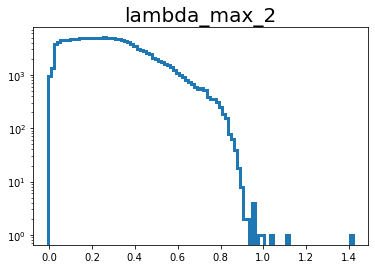

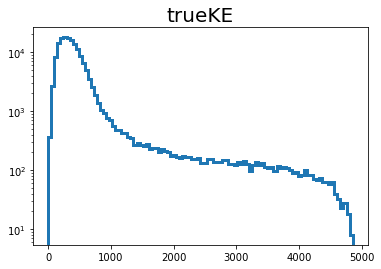

In [47]:
hists("total_hits2")
hists('total_ring_PEs2')
hists('recoDWallR2')
hists('recoDWallZ2')
hists('lambda_max_2')
hists('trueKE')

Visualised all the relevant data. Now onto exercise 2

# Exercise 2

Create new dataframe

In [37]:
# Relevant numu
numu_data = numu[["total_hits2", "total_ring_PEs2", "recoDWallR2", "recoDWallZ2", "lambda_max_2", "trueKE"]]

In [38]:
numu_data

,total_hits2,total_ring_PEs2,recoDWallR2,recoDWallZ2,lambda_max_2,trueKE
0,0.023325,0.00000,0.003389,0.458415,0.650854,236.327
1,0.010075,0.00000,0.003389,0.458415,0.405903,186.765
2,0.080400,0.13070,0.035389,0.753969,0.537975,448.481
3,0.011950,0.00000,0.042498,0.083664,0.830098,586.647
4,0.142300,0.26265,0.616305,0.164307,0.092105,963.822
...,...,...,...,...,...,...
166181,0.056000,0.07730,0.524681,0.094948,0.293151,356.525
166182,0.009150,0.00000,0.435005,0.604201,0.264387,92.382
166183,0.147675,0.23995,-0.046764,0.413032,0.402720,2464.460
166184,0.081425,0.13985,0.157146,0.330336,0.175398,480.235


In [43]:
# Collection of signal and training
trueK = np.array(numu_data['trueKE'].tolist())
print(trueK)
# training
input_data = numu_data.drop(['trueKE'], axis=1)
print(input_data)
# make into array
input_datas = input_data.values
print(input_datas)

[ 236.327  186.765  448.481 ... 2464.46   480.235  480.235]
        total_hits2  total_ring_PEs2  recoDWallR2  recoDWallZ2  lambda_max_2
0          0.023325          0.00000     0.003389     0.458415      0.650854
1          0.010075          0.00000     0.003389     0.458415      0.405903
2          0.080400          0.13070     0.035389     0.753969      0.537975
3          0.011950          0.00000     0.042498     0.083664      0.830098
4          0.142300          0.26265     0.616305     0.164307      0.092105
...             ...              ...          ...          ...           ...
166181     0.056000          0.07730     0.524681     0.094948      0.293151
166182     0.009150          0.00000     0.435005     0.604201      0.264387
166183     0.147675          0.23995    -0.046764     0.413032      0.402720
166184     0.081425          0.13985     0.157146     0.330336      0.175398
166185     0.081425          0.13985     0.156677     0.330284      0.176352

[163592 rows x 

In [45]:
# Split datasets
from sklearn import model_selection
Answer_to_all_questions = 42
# train - test split of dataset
train_data, test_data, train_target, test_target = model_selection.train_test_split(\
 input_datas, trueK , test_size =0.3 , random_state = Answer_to_all_questions)
print ( train_data.shape , train_target.shape , test_data.shape , test_target.shape )

(114514, 5) (114514,) (49078, 5) (49078,)


Now to implement a NN, using a reasonable number of layers and nodes

In [60]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# callbacks
callbacks_ = [
# if we don ’t have an increase of the accuracy for 10 epochs , terminate training .
EarlyStopping(verbose = True, patience=10 , monitor = 'loss') ,
# Always make sure that we ’ re saving the model weights with the best accuracy .
ModelCheckpoint('model.h5' , monitor='loss' , verbose=0 , save_best_only = True , mode = 'max')]

In [61]:
# 
def simple_model(num_nodes = 10, extra_depth = 1):
    # create model
    # 5 inputs, 1 output
    num_inputs = 5
    num_outputs = 1
    model = Sequential()
    # no activation required for the output , as this is a regression problem ,
    # ie . we need a numerical prediction for any input
    model.add(Dense(num_nodes, input_dim = num_inputs , kernel_initializer = "normal", activation = "relu" ))
    model.add(Dropout(0.2))
    
    # extra layers
    for i in range(extra_depth):
        # extra layers time, we'll make them the same as previous
        model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer='normal', \
                   activation='relu'))
        model.add(Dropout(0.2))
        
    model.add(Dense( num_outputs , kernel_initializer = "normal" ))
    # Compile model
    model.compile(loss = "mean_squared_error" , optimizer = "adam")
    return model

In [68]:
# Cross validation
batchSize = 500
N_epochs = 50
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
from sklearn.pipeline import Pipeline
estimators = []
estimators.append(('mlp', KerasRegressor(build_fn = simple_model , epochs = N_epochs , batch_size = batchSize , verbose =1)))
pipeline = Pipeline( estimators )
kfold = KFold( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
results = cross_val_score( pipeline , train_data , train_target , cv = kfold ,
fit_params = { 'mlp__callbacks' : callbacks_ } , scoring = 'r2')
print ( " Result : %.2f %s %.2f " % ( results.mean() , u"\u00B1" , results.std()))

Epoch 1/50
207/207 [==============================] - 0s 1ms/step - loss: 651259.4585
Epoch 2/50
207/207 [==============================] - 0s 910us/step - loss: 626084.7031
Epoch 3/50
207/207 [==============================] - 0s 900us/step - loss: 574715.2909
Epoch 4/50
207/207 [==============================] - 0s 896us/step - loss: 460645.5451
Epoch 5/50
207/207 [==============================] - 0s 979us/step - loss: 383314.5559
Epoch 6/50
207/207 [==============================] - 0s 853us/step - loss: 340567.0614
Epoch 7/50
207/207 [==============================] - 0s 782us/step - loss: 328538.4880
Epoch 8/50
207/207 [==============================] - 0s 873us/step - loss: 318918.1620
Epoch 9/50
207/207 [==============================] - 0s 1ms/step - loss: 301540.3338
Epoch 10/50
207/207 [==============================] - 0s 939us/step - loss: 282339.7248
Epoch 11/50
207/207 [==============================] - 0s 899us/step - loss: 261955.6011
Epoch 12/50
207/207 [=============

207/207 [==============================] - 0s 993us/step - loss: 134563.6304
Epoch 44/50
207/207 [==============================] - 0s 1ms/step - loss: 135747.7461
Epoch 45/50
207/207 [==============================] - 0s 1ms/step - loss: 138045.0466
Epoch 46/50
207/207 [==============================] - 0s 1ms/step - loss: 133162.0116
Epoch 47/50
207/207 [==============================] - 0s 1ms/step - loss: 136733.1870
Epoch 48/50
207/207 [==============================] - 0s 829us/step - loss: 134926.6398
Epoch 49/50
207/207 [==============================] - 0s 895us/step - loss: 132408.7345
Epoch 50/50
23/23 [==============================] - 0s 464us/step
Epoch 1/50
207/207 [==============================] - 0s 1ms/step - loss: 642456.9486
Epoch 2/50
207/207 [==============================] - 0s 852us/step - loss: 640067.3975
Epoch 3/50
207/207 [==============================] - 0s 1ms/step - loss: 538633.7305
Epoch 4/50
207/207 [==============================] - 0s 1ms/step - lo

207/207 [==============================] - 0s 895us/step - loss: 137099.9553
Epoch 36/50
207/207 [==============================] - 0s 958us/step - loss: 136199.5811
Epoch 37/50
207/207 [==============================] - 0s 1ms/step - loss: 138090.1043
Epoch 38/50
207/207 [==============================] - 0s 1ms/step - loss: 132681.2945
Epoch 39/50
207/207 [==============================] - 0s 1ms/step - loss: 139450.7219
Epoch 40/50
207/207 [==============================] - 0s 1ms/step - loss: 133081.7001
Epoch 41/50
207/207 [==============================] - 0s 1ms/step - loss: 136553.0234
Epoch 42/50
207/207 [==============================] - 0s 961us/step - loss: 130502.5608
Epoch 43/50
207/207 [==============================] - 0s 1ms/step - loss: 135021.6926
Epoch 44/50
207/207 [==============================] - 0s 1ms/step - loss: 133637.9956
Epoch 45/50
207/207 [==============================] - 0s 1ms/step - loss: 132444.1359
Epoch 46/50
207/207 [============================

207/207 [==============================] - 0s 1ms/step - loss: 142137.6674
Epoch 28/50
207/207 [==============================] - 0s 1ms/step - loss: 140859.6724
Epoch 29/50
207/207 [==============================] - 0s 1ms/step - loss: 144670.2301
Epoch 30/50
207/207 [==============================] - 0s 986us/step - loss: 147017.8576
Epoch 31/50
207/207 [==============================] - 0s 976us/step - loss: 140587.1245
Epoch 32/50
207/207 [==============================] - 0s 1ms/step - loss: 143797.6372
Epoch 33/50
207/207 [==============================] - 0s 1ms/step - loss: 139054.8002
Epoch 34/50
207/207 [==============================] - 0s 1ms/step - loss: 142909.3700
Epoch 35/50
207/207 [==============================] - 0s 1ms/step - loss: 137170.0422
Epoch 36/50
207/207 [==============================] - 0s 959us/step - loss: 140819.3522
Epoch 37/50
207/207 [==============================] - 0s 1ms/step - loss: 139788.5057
Epoch 38/50
207/207 [============================

207/207 [==============================] - 0s 1ms/step - loss: 141797.5833
Epoch 20/50
207/207 [==============================] - 0s 1ms/step - loss: 142554.3188
Epoch 21/50
207/207 [==============================] - 0s 994us/step - loss: 132729.2876
Epoch 22/50
207/207 [==============================] - 0s 1ms/step - loss: 134544.0261
Epoch 23/50
207/207 [==============================] - 0s 1ms/step - loss: 132707.4285
Epoch 24/50
207/207 [==============================] - 0s 1ms/step - loss: 136515.4193
Epoch 25/50
207/207 [==============================] - 0s 1ms/step - loss: 135464.1337
Epoch 26/50
207/207 [==============================] - 0s 1ms/step - loss: 135049.9217
Epoch 27/50
207/207 [==============================] - 0s 1ms/step - loss: 135653.6445
Epoch 28/50
207/207 [==============================] - 0s 1ms/step - loss: 134500.5182
Epoch 29/50
207/207 [==============================] - 0s 1ms/step - loss: 137519.6850
Epoch 30/50
207/207 [==============================] 

207/207 [==============================] - 0s 1ms/step - loss: 214171.6848
Epoch 13/50
207/207 [==============================] - 0s 1ms/step - loss: 196103.3046
Epoch 14/50
207/207 [==============================] - 0s 1ms/step - loss: 165512.9594
Epoch 15/50
207/207 [==============================] - 0s 1ms/step - loss: 153289.0773
Epoch 16/50
207/207 [==============================] - 0s 1ms/step - loss: 149111.8040
Epoch 17/50
207/207 [==============================] - 0s 1ms/step - loss: 136162.8944
Epoch 18/50
207/207 [==============================] - 0s 1ms/step - loss: 139642.7940
Epoch 19/50
207/207 [==============================] - 0s 1ms/step - loss: 136238.4980
Epoch 20/50
207/207 [==============================] - 0s 1ms/step - loss: 143416.8975
Epoch 21/50
207/207 [==============================] - 0s 1ms/step - loss: 136014.5446
Epoch 22/50
207/207 [==============================] - 0s 1ms/step - loss: 143146.3650
Epoch 23/50
207/207 [==============================] - 

In [70]:
# Cross validation results
print ( " Result : %.2f %s %.2f " % ( results.mean() , u"\u00B1" , results.std()))

 Result : 0.72 ± 0.01 


We now have reasonable cross validation results, looking at part b) we apply fitting with our model, with our validation data.

In [71]:
# create a pointer to our simple model
model = simple_model()

In [74]:
# predict energy values with our model
history = model.fit(train_data, train_target, batch_size = batchSize, epochs=N_epochs, \
                    verbose = 1, validation_data=(test_data, test_target), callbacks=callbacks_)

Epoch 1/50
230/230 [==============================] - 1s 2ms/step - loss: 640512.7511 - val_loss: 628811.0000
Epoch 2/50
230/230 [==============================] - 0s 1ms/step - loss: 606931.4729 - val_loss: 550054.6875
Epoch 3/50
230/230 [==============================] - 0s 1ms/step - loss: 514044.0272 - val_loss: 412465.3438
Epoch 4/50
230/230 [==============================] - 0s 1ms/step - loss: 400716.3396 - val_loss: 331436.1562
Epoch 5/50
230/230 [==============================] - 0s 1ms/step - loss: 342422.2263 - val_loss: 310010.2812
Epoch 6/50
230/230 [==============================] - 0s 1ms/step - loss: 329728.1958 - val_loss: 297448.7500
Epoch 7/50
230/230 [==============================] - 0s 1ms/step - loss: 315480.7008 - val_loss: 283815.3125
Epoch 8/50
230/230 [==============================] - 0s 1ms/step - loss: 302789.3816 - val_loss: 266796.9062
Epoch 9/50
230/230 [==============================] - 0s 2ms/step - loss: 282151.2121 - val_loss: 245822.8281
Epoch 10/5

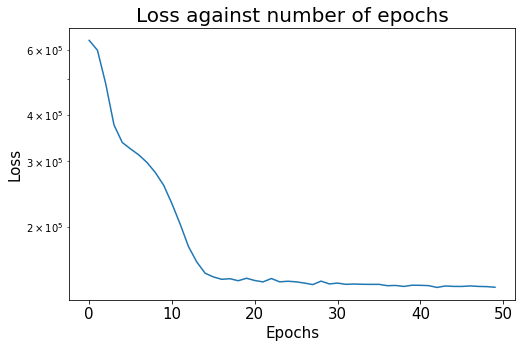

Final validation accuracy: 637423.06


In [82]:
# Show results
# plot loss
plt.figure(figsize = (8,5))
plt.plot(history.history["loss"])
#plt.yscale('log')
plt.title("Loss against number of epochs", fontsize = 20)
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.yscale('log')
plt.show()

print("Final validation accuracy: {:.2f}".format(max(history.history['loss'])))

Now that we've plotted the loss (it being large is expected due to the mean_squared_error application), we will use the method predict to get an array of predicted muon-energy values.

In [83]:
# predicted values
predict_data = model.predict(test_data)

Text(0, 0.5, 'Predicted energies (MeV)')

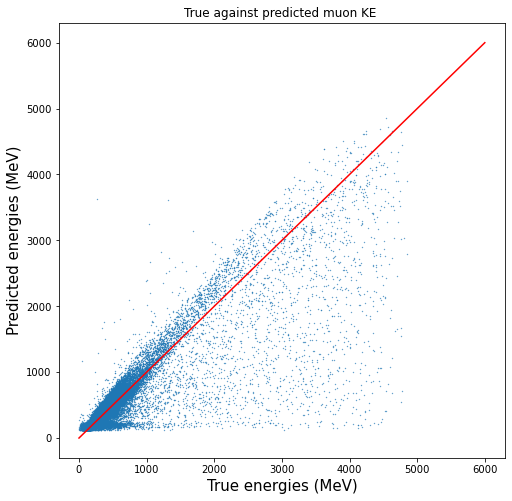

In [90]:
# Compare true against predicted energy values
plt.figure(figsize=(8,8))
# plot scatter
plt.scatter(test_target, predict_data, s = 0.1)
# plot xy line
plt.plot([0,6000], [0,6000], color = 'red')
plt.title("True against predicted muon KE ")
plt.xlabel("True energies (MeV)", fontsize = 15)
plt.ylabel("Predicted energies (MeV)", fontsize = 15)

So it works decently well. Now onto exercise 3

# Exercise 3

We first try to get a quick result by using a GBRT with the default parameters.

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbr0 = GradientBoostingRegressor(n_estimators =100)
gbr0.fit(train_data,train_target.ravel())



GradientBoostingRegressor()

In [95]:
print("R^2 score for test data")
print(gbr0.score(test_data, test_target))
print("")
print("R^2 score for training data")
print(gbr0.score(train_data, train_target))


R^2 score for test data
0.781797050479113

R^2 score for training data
0.7830727956686763


These values (of approximately 78%) are better than our NN regressor in most cases.

b) Now will do proper optimisation by using a grid-search of the regressor parameters and X-validation in order to identify the optimal regressor. 

In [101]:
# USING HALVING SEARCH CV OTHERWISE WOULD TAKE FOREVER

# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV

param_grid_ = {
'n_estimators':[100] ,
'learning_rate': [0.1 , 0.05] ,
'max_depth':[5 , 10] ,
'min_samples_leaf' :[50 ,100] ,
}
njobs_=8 # jobs to run in parallel
# min resources is defined at 1/4 of the training data
np.random.seed(Answer_to_all_questions)
gbr = GradientBoostingRegressor()
classifier = HalvingGridSearchCV(estimator = gbr , cv = kfold , param_grid = param_grid_ ,
n_jobs = njobs_ , verbose =1, max_resources = len(train_data), min_resources = int(0.25*len(train_data)))

classifier.fit(train_data , train_target.ravel())
print (" Best estimator : ")
print (classifier.best_estimator_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 28628
max_resources_: 114514
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 28628
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 3
n_resources: 85884
Fitting 10 folds for each of 3 candidates, totalling 30 fits
 Best estimator : 
GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50)


In [102]:
# import the plot_learning_curve function from nn_utils
import nn_utils

<module 'matplotlib.pyplot' from '/opt/anaconda-2021.05/envs/daml/lib/python3.8/site-packages/matplotlib/pyplot.py'>

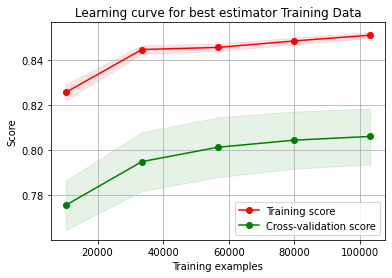

In [110]:
# Find learning curve for training data
nn_utils.plot_learning_curve(GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50), "Learning curve for best estimator Training Data", train_data, train_target, cv=kfold, n_jobs = 8)

<module 'matplotlib.pyplot' from '/opt/anaconda-2021.05/envs/daml/lib/python3.8/site-packages/matplotlib/pyplot.py'>

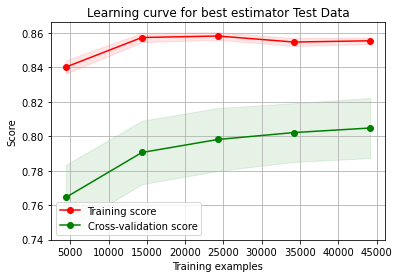

In [109]:
# Find learning curve for training data
nn_utils.plot_learning_curve(GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50), "Learning curve for best estimator Test Data", test_data, test_target, cv=kfold, n_jobs = 8)

The score doesnt increase too much over the last half of the examples, but cross-validation score seems to be increasing. The gap betwen the cross validation and train score represents overfitting which appears to be improving over our results.
Now onto c) we'll be creating a new GBRT regressor with parameters determined by the best estimator and finding the R^2 score

In [115]:
# Cross validation again, with new regressor
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)

estimators = []
estimators.append(('GBRT', GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50)))
pipeline = Pipeline( estimators )
kfold = KFold( n_splits =10 , random_state = Answer_to_all_questions , shuffle = True )
results = cross_val_score( pipeline , train_data , train_target , cv = kfold , scoring = 'r2')
print ( " Result : %.2f %s %.2f " % ( results.mean() , u"\u00B1" , results.std()))

 Result : 0.81 ± 0.01 


R^2 of 0.81 pm 0.01, which is better than our previous regressor but not by a lot.

Now we'll apply this model by fitting to a training dataset and predicting KE values from the test dataset to get predicted muon-energy values.

In [116]:
# Fitting
fitting = GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50).fit(train_data, train_target)

In [117]:
# Creating the predicted data
predict_data_GBRT = fitting.predict(test_data)

Text(0, 0.5, 'Predicted energies (MeV)')

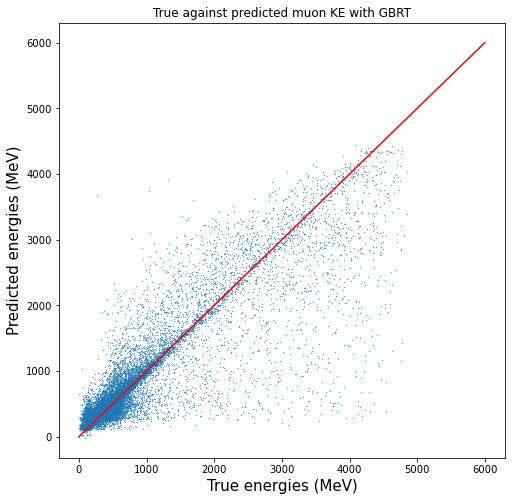

In [118]:
# PLotting the predicted and test target
# Compare true against predicted energy values
plt.figure(figsize=(8,8))
# plot scatter
plt.scatter(test_target, predict_data_GBRT, s = 0.1)
# plot xy line
plt.plot([0,6000], [0,6000], color = 'red')
plt.title("True against predicted muon KE with GBRT")
plt.xlabel("True energies (MeV)", fontsize = 15)
plt.ylabel("Predicted energies (MeV)", fontsize = 15)

So we can see its a bit better than our previous regressor, but not by much. Now we'll look at the feature_importances_ on the optimised regressor to see what input features have the greatest impact.

In [119]:
print(fitting.feature_importances_)

[0.10609175 0.76755079 0.0285255  0.02926881 0.06856316]


Not really clear from this, lets make a bar chart.

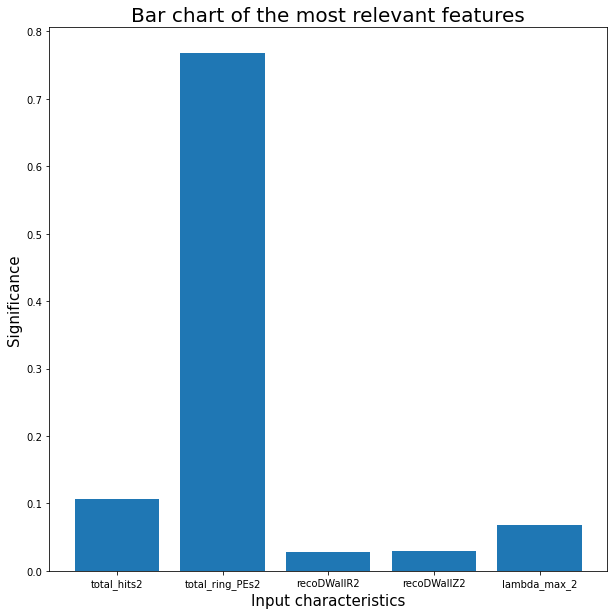

In [127]:
plt.figure(figsize=(10,10))
features = ["total_hits2",'total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2']
plt.bar(features, fitting.feature_importances_)
plt.title("Bar chart of the most relevant features", fontsize = 20)
plt.xlabel("Input characteristics", fontsize = 15)
plt.ylabel("Significance", fontsize = 15)
plt.show()

In [132]:
# sorting resultant feature
bar = fitting.feature_importances_

# create a tuple for the features and their labels
tup = list(zip(features, bar))
print(tup)

[('total_hits2', 0.1060917485806535), ('total_ring_PEs2', 0.7675507916260605), ('recoDWallR2', 0.02852549653847515), ('recoDWallZ2', 0.029268807360469183), ('lambda_max_2', 0.06856315589434171)]


In [135]:
# sort by largest to smallest
sort_list = sorted(tup, key = lambda x: x[1])
print(sort_list)

[('recoDWallR2', 0.02852549653847515), ('recoDWallZ2', 0.029268807360469183), ('lambda_max_2', 0.06856315589434171), ('total_hits2', 0.1060917485806535), ('total_ring_PEs2', 0.7675507916260605)]


In [143]:
data_vals = [x[1] for x in sort_list]
data_tags = [x[0] for x in sort_list]
print(data_vals)
print(data_tags)

[0.02852549653847515, 0.029268807360469183, 0.06856315589434171, 0.1060917485806535, 0.7675507916260605]
['recoDWallR2', 'recoDWallZ2', 'lambda_max_2', 'total_hits2', 'total_ring_PEs2']


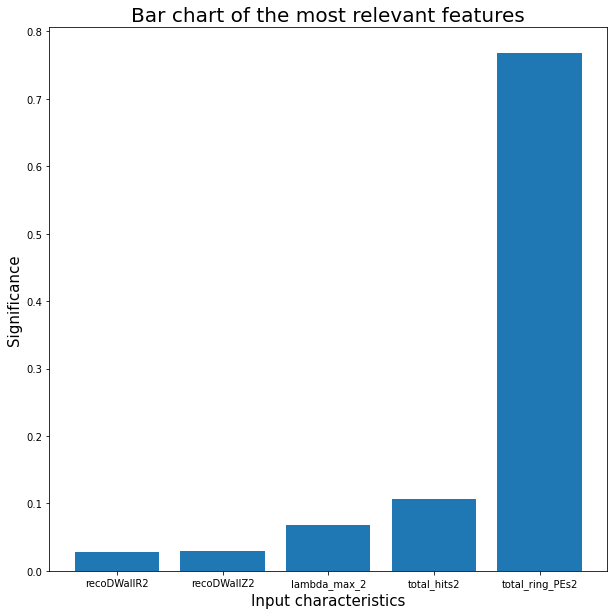

In [144]:
plt.figure(figsize=(10,10))
features = ["total_hits2",'total_ring_PEs2','recoDWallR2','recoDWallZ2','lambda_max_2']
plt.bar(data_tags, data_vals)
plt.title("Bar chart of the most relevant features", fontsize = 20)
plt.xlabel("Input characteristics", fontsize = 15)
plt.ylabel("Significance", fontsize = 15)
plt.show()

Here we can see that the most revelant variable is total_ring_PEs2, which is the number of PMT hits that have been assigned to Cherenkov rings, divided by 4500. This isn't too surprising as we would expect the number of PMT hits to be directly correlated to the energy outputted by the muon (more energy -> more cherenkov radiation -> more PMT hits).